<a href="https://github.com/MasahiroAraki/MachineLearning/blob/master/Python/chap05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章

Scikit learn の [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)（生成モデル）と [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)（識別モデル） で [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) データを識別します。



In [2]:
#出力を小数点以下3桁に制限。DataFrame内では設定は無効
%precision 3

'%.3f'

## 準備

必要なライブラリ等を読み込みます。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## データの読み込み

irisデータを読み込みます。引数as_FrameをTrueにすると、戻り値のdata属性（特徴ベクトル）がpandasのDataFrame形式、target属性（正解情報）がSeries形式になります。

In [4]:
iris = load_iris(as_frame=True)

データ分析のため、特徴ベクトルと正解情報を結合したDataFrameを作成します。

In [5]:
df = iris.data.copy()
df['class']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


クラス毎の統計値を表示します。

In [6]:
grouped = df.groupby('class')
grouped.describe()

sepal length (cm)                                              \
                  count   mean       std  min    25%  50%  75%  max   
class                                                                 
0                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

      sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                 count   mean  ...               75%  max            count   
class                          ...                                           
0                 50.0  3.428  ...             1.575  1.9             50.0   
1                 50.0  2.770  ...             4.600  5.1             50.0   
2                 50.0  2.974  ...             5.875  6.9             50.0   

                                                 
        mean       std  min  25%  50%  75%  max  
class                                            
0      0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1      1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2      2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

class
0    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
2    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
dtype: object

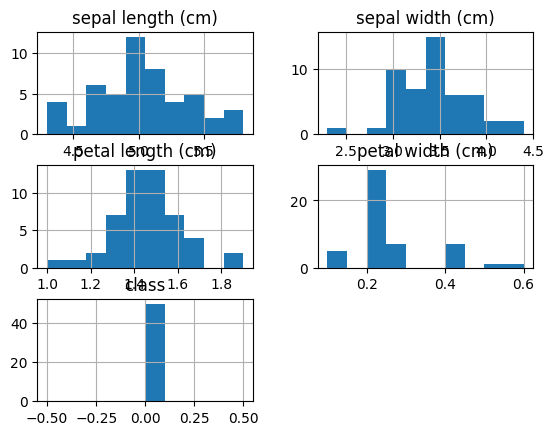

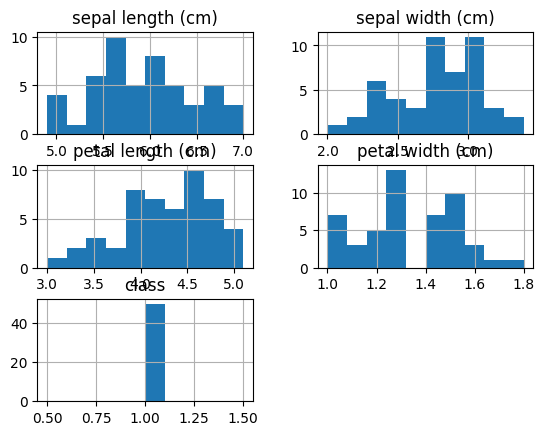

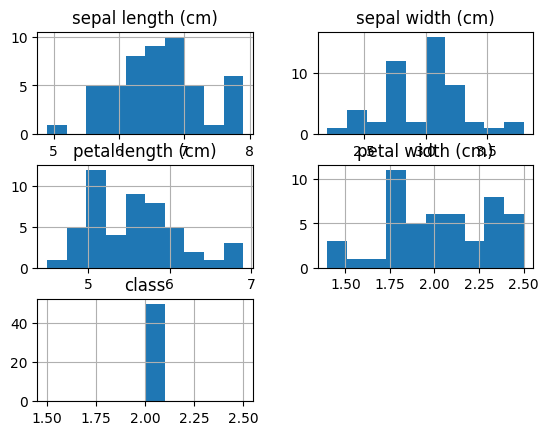

In [7]:
grouped.hist()

パターン行列をX, 正解ラベルベクトルをyとします。XはDataFrame、yはSeriesですが、scikit-learnの新しいバージョンでは、ndarrayに変換せずにこのまま学習に用いることができます。

In [8]:
X = iris.data
y = iris.target
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## データの可視化

t-SNEを使って2次元データに変換し、散布図で表示します。

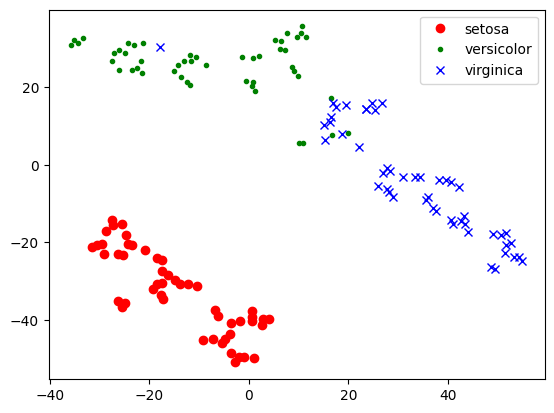

In [9]:
tsne = TSNE(perplexity=5)
X2 = tsne.fit_transform(X)
plt.plot(X2[y==0,0], X2[y==0,1],"ro", label = iris.target_names[0])
plt.plot(X2[y==1,0], X2[y==1,1],"g.", label = iris.target_names[1])
plt.plot(X2[y==2,0], X2[y==2,1],"bx", label = iris.target_names[2])
plt.legend()

## ナイーブベイズ

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [10]:
clf1 = GaussianNB()
clf1.fit(X, y)

GaussianNB()

In [11]:
scores = cross_val_score(clf1, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.95 (+/- 0.09)


### 学習結果の表示

各クラスの正規分布の平均(theta)と分散(var)を表示します。

In [12]:
clf1.theta_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [13]:
clf1.var_

array([[0.122, 0.141, 0.03 , 0.011],
       [0.261, 0.097, 0.216, 0.038],
       [0.396, 0.102, 0.298, 0.074]])

この結果は、たとえばクラス0(setosa; 先頭の50個)の特徴 sepal lengthを表す正規分布は平均5.006、分散0.122と最尤推定されたことを示しています。他の特徴、他のクラスについても読み込んだDataFrameを参照して、妥当な値になっていることを確認してください。

## ロジスティック回帰

識別器のインスタンスを作成し、fitメソッドで動作を確認します。次に、交差確認法で性能を評価します。

In [14]:
clf2 = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
clf2.fit(X, y)

LogisticRegression(max_iter=1000)

In [15]:
scores = cross_val_score(clf2, X, y, cv=10)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

Accuracy: 0.97 (+/- 0.07)


### 学習結果の表示

各クラスの識別関数の重み(coef)と切片(intercept)を表示します。

In [16]:
clf2.coef_

array([[-0.423,  0.967, -2.517, -1.081],
       [ 0.534, -0.322, -0.207, -0.944],
       [-0.111, -0.645,  2.723,  2.024]])

In [17]:
clf2.intercept_

array([  9.849,   2.238, -12.087])

この結果は、たとえばクラス0 (setosa)について、識別関数が $g_0(\mathbf{x}) = -0.423 x_1 + 0.967 x_2 - 2.517 x_3 -1.081 x_4 +9.849$ という式になったことを表します。絶対値が大きい係数ほどそのクラスの判定に大きく寄与していると解釈できます。

# 演習問題

scikit-learn付属のwineデータ、breast-cancerデータに対して生成モデル・識別モデルそれぞれで識別を行い、問題の難しさと適したモデルとの関係を考察してください。ただし、元のデータを使うと正解率が高く、モデルの違いがわかりにくいので、いずれも主成分分析(PCA)で2次元に変換したデータを対象に識別を行ってください。


## 解答例


## wineデータ

NB Accuracy: 0.73 (+/- 0.17)
LR Accuracy: 0.69 (+/- 0.17)


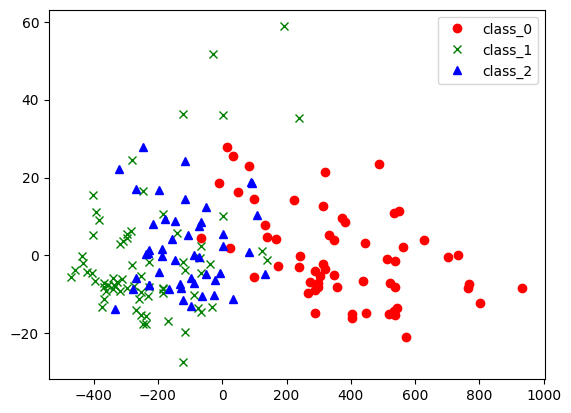

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

wine = load_wine(as_frame=True)
Xw = wine.data
yw = wine.target

pca = PCA(n_components=2)
Xw2 = pca.fit_transform(Xw)
plt.plot(Xw2[yw==0,0], Xw2[yw==0,1],"ro", label = wine.target_names[0])
plt.plot(Xw2[yw==1,0], Xw2[yw==1,1],"gx", label = wine.target_names[1])
plt.plot(Xw2[yw==2,0], Xw2[yw==2,1],"b^", label = wine.target_names[2])
plt.legend()

clf1 = GaussianNB()
scores = cross_val_score(clf1, Xw2, yw, cv=10)
print(f"NB Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

clf2 = LogisticRegression()
scores = cross_val_score(clf2, Xw2, yw, cv=10)
print(f"LR Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

若干ナイーブベイズの方が性能が良いように見えますが、ベースの性能が低いので、この問題は統計的アプローチが適していない問題であると見ることができます。

## breast-cancerデータ

NB Accuracy: 0.90 (+/- 0.06)
LR Accuracy: 0.93 (+/- 0.06)


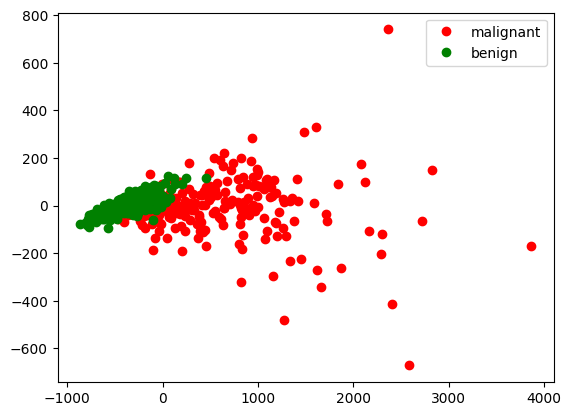

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

bc = load_breast_cancer(as_frame=True)
Xb = bc.data
yb = bc.target

pca = PCA(n_components=2)
Xb2 = pca.fit_transform(Xb)
plt.plot(Xb2[yb==0,0], Xb2[yb==0,1],"ro", label = bc.target_names[0])
plt.plot(Xb2[yb==1,0], Xb2[yb==1,1],"go", label = bc.target_names[1])
plt.legend()

clf1 = GaussianNB()
scores = cross_val_score(clf1, Xb2, yb, cv=10)
print(f"NB Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

clf2 = LogisticRegression()
scores = cross_val_score(clf2, Xb2, yb, cv=10)
print(f"LR Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})")

散布図を見るとそれぞれのデータがある程度固まって分布しているので、統計的アプローチでもある程度の性能が出ることが期待されます。しかし、一部重なりがあるので、このようなクラスがあまりきれいに分離されていないデータでは、生成モデルであるGaussianNBよりも識別モデルであるLogisticRegressionのほうが一般に正解率が高くなる傾向があります。